In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [46]:
df=pd.read_csv(r"C:\Users\ChallaEswaraiah\OneDrive\Desktop\P\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [49]:
df.DiabetesPedigreeFunction.value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.207    5
0.261    5
0.259    5
        ..
0.565    1
0.118    1
0.177    1
0.176    1
0.295    1
Name: count, Length: 517, dtype: int64

In [50]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [51]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [52]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [53]:
print(f'x={x.shape},y={y.shape}')

x=(768, 8),y=(768,)


In [54]:
x=df.drop(['Outcome'],axis=1)
print(f'x={x.shape}')


x=(768, 8)


In [55]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [57]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [58]:
classifier=svm.SVC(kernel='linear')

In [59]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [60]:
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [61]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report

In [62]:
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [63]:
print('Accuracy score of the data:',test_data_accuracy)

Accuracy score of the data: 0.7727272727272727


In [64]:
print('Accuracy score of the data:',training_data_accuracy)

Accuracy score of the data: 0.7833876221498371


Text(0.5, 1.0, 'Confusion Matrix- svm Classifier ')

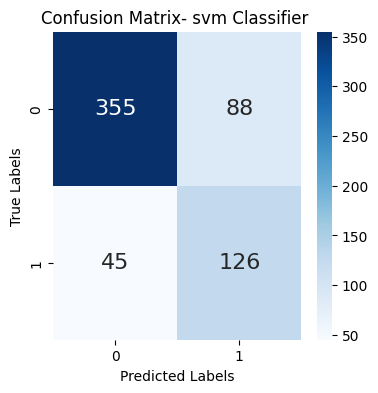

In [ ]:
cm_train=confusion_matrix(x_train_prediction, y_train)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')



Text(0.5, 1.0, 'Confusion Matrix- svm Classifier ')

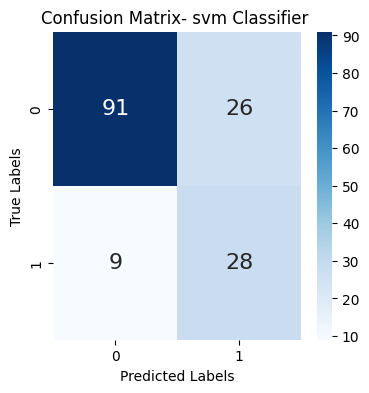

In [66]:
cm_test=confusion_matrix(x_test_prediction, y_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')



In [67]:
import pickle


In [68]:
filename='d_model.sav'
pickle.dump(classifier,open(filename,'wb'))